In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/boston_data.csv')

In [3]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 15)

#### This dataset has 506 observations and 15 features

In [5]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  target      506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


#### We have all float values.

In [7]:
data.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
target        0
dtype: int64

#### No null data

In [8]:
data.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [9]:
feat = data.columns
feat

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [10]:
for item in feat: 
    print(f'Number of Unique values in {item} : {len(data[item].value_counts())}')

Number of Unique values in CRIM : 504
Number of Unique values in ZN : 26
Number of Unique values in INDUS : 76
Number of Unique values in CHAS : 2
Number of Unique values in NOX : 81
Number of Unique values in RM : 446
Number of Unique values in AGE : 356
Number of Unique values in DIS : 412
Number of Unique values in RAD : 9
Number of Unique values in TAX : 66
Number of Unique values in PTRATIO : 46
Number of Unique values in B : 357
Number of Unique values in LSTAT : 455
Number of Unique values in target : 229


In [11]:
data['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [12]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [13]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

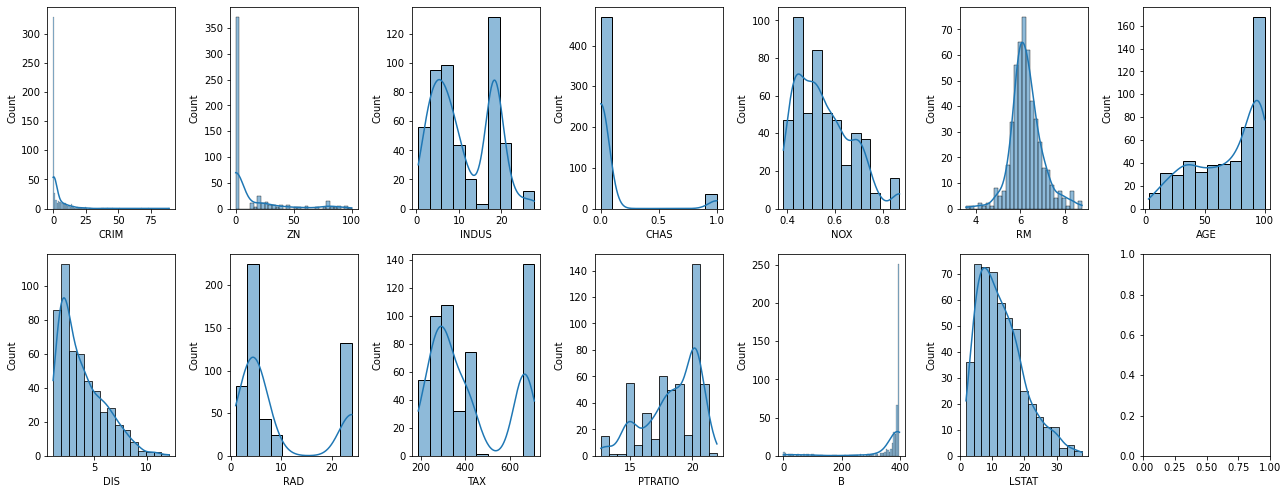

In [14]:
fig, axes = plt.subplots(2,7, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6]]

for i in range(len(feat)-1): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.histplot(data = data, x = feat[i], kde = True, ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(feat[i])
    
    
plt.show()   

In [15]:
feat

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

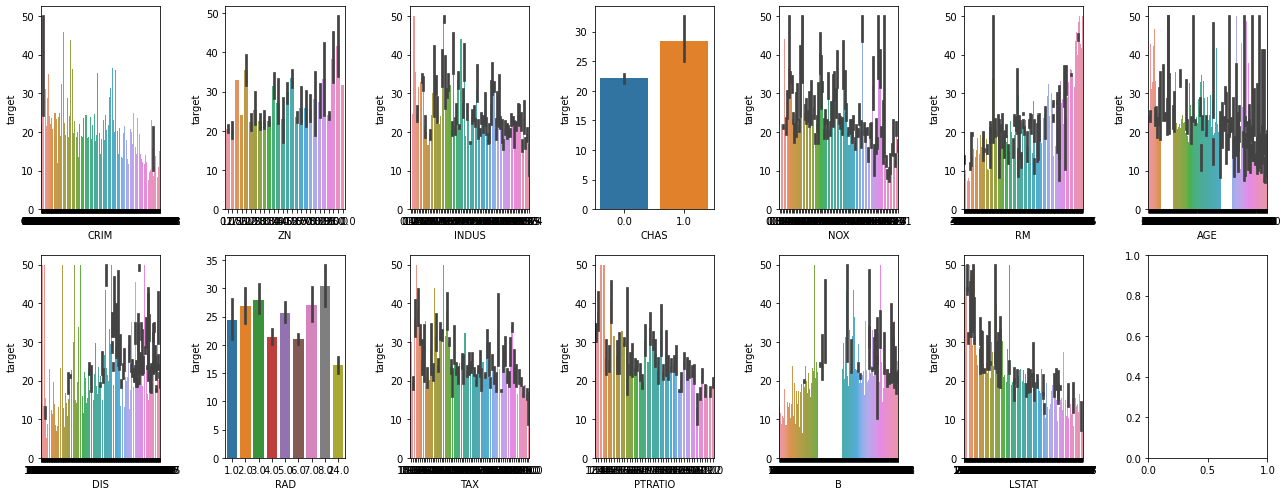

In [16]:
fig, axes = plt.subplots(2,7, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6]]

for i in range(len(feat)-1): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.barplot(data = data, x = feat[i], y =data['target'], ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(feat[i])
    
plt.show()    

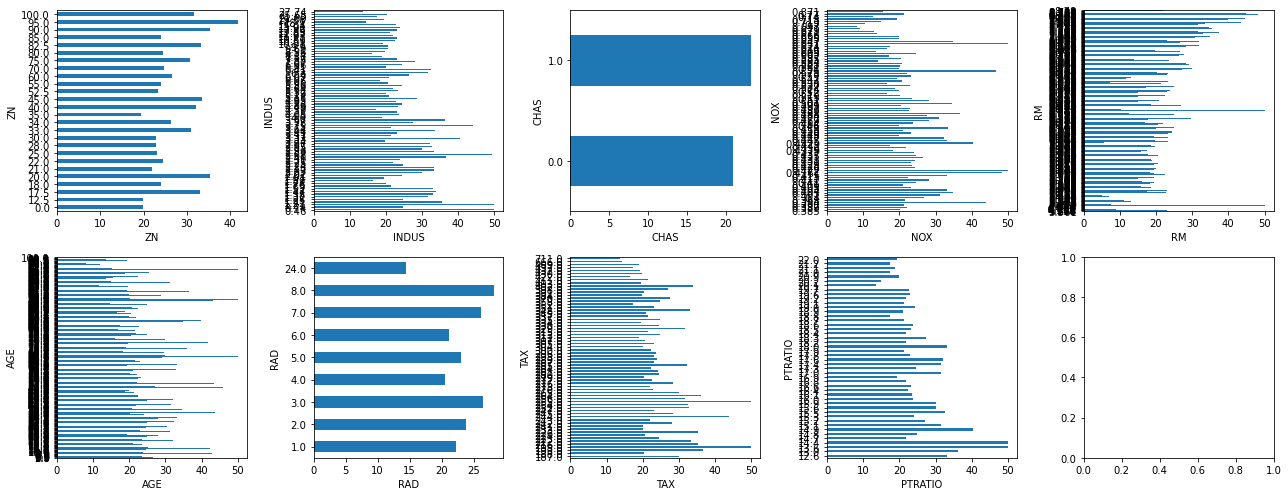

In [17]:

fig, axes = plt.subplots(2,5, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4]]

feat1 = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'RAD', 'TAX', 'PTRATIO']
for i in range(len(feat1)): 
    j = s1[i][0]
    k = s1[i][1]
    data.groupby(feat1[i])['target'].median().plot(kind = 'barh', ax = axes[j,k])
    axes[j,k].set_xlabel(feat1[i])
    
    
plt.show()   

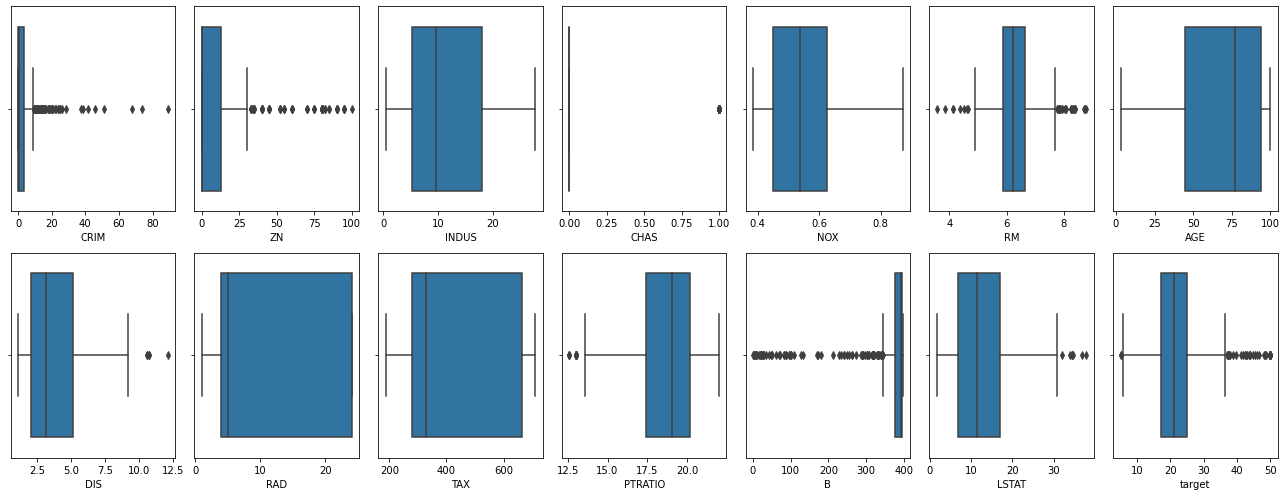

In [18]:
# checking outliers : 

fig, axes = plt.subplots(2,7, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], 
      [1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6]]

#feat1 = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
#         'RAD', 'TAX', 'PTRATIO']
for i in range(len(feat)): 
    j = s1[i][0]
    k = s1[i][1]
    sns.boxplot(data = data, x = feat[i], ax = axes[j,k])
    axes[j,k].set_xlabel(feat[i])
    
    
plt.show()   


<AxesSubplot:>

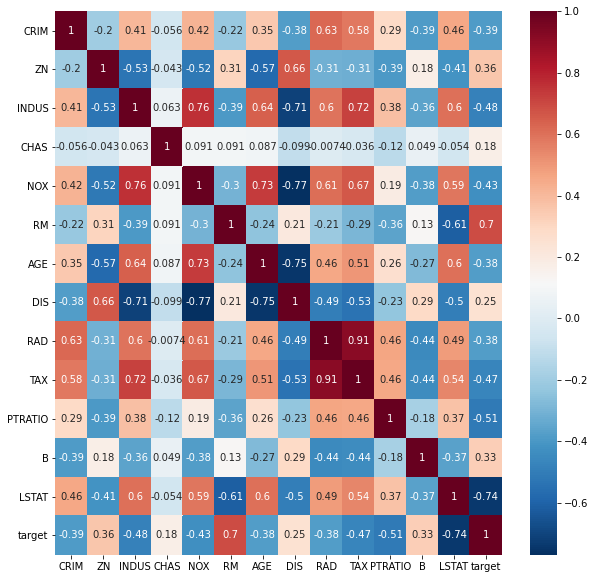

In [19]:

fig, axes = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'RdBu_r',annot=True)

### Checking Multicollinearity : 
- Method 1 : Feature correlation
- Method 2 : Finding VIF  

In [20]:
# finding out if any feature has correlation more than 70% 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
    return col_corr
     

corr_features = correlation(data, 0.8)
corr_features     



{'RAD', 'TAX'}

### 'TAX' is highly correlatd with 'RAD'. We can think of dropping both of these columns. 

In [21]:
# finding out if any feature has correlation less than 0.01% 

def correlation1(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) < threshold: 
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                
            else :
                col_corr.add('None')
                
    return col_corr




corr_feature1 = correlation1(data, 0.01)
corr_feature1

{'CHAS', 'None', 'RAD'}

In [22]:
# finding VIF 

from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


calculate_vif(df=data, features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                                   'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                   'PTRATIO', 'B', 'LSTAT'])

,VIF,Tolerance
CRIM,1.792192,0.557976
ZN,2.298758,0.435017
INDUS,3.991596,0.250526
CHAS,1.073995,0.931103
NOX,4.393720,0.227598
RM,1.933744,0.517131
AGE,3.100826,0.322495
DIS,3.955945,0.252784
RAD,7.484496,0.133610
TAX,9.008554,0.111006


### The VIF factors for 'TAX' and 'RAD' are high in compare to other features. We can consider to drop these features. 